In [46]:
import warnings
warnings.filterwarnings('ignore')

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Lesson 4*
On Monday we talked about summarizing your documents using just token counts. Today, we're going to learn about a much more sophiscated approach - learning 'topics' from documents. Topics are a latent structure. They are not directly observable in the data, but we know they're there by reading them.

> **latent**: existing but not yet developed or manifest; hidden or concealed.

## Use Cases
Primary use case: what the hell are your documents about? Who might want to know that in industry - 
* Identifing common themes in customer reviews
* Discoverying the needle in a haystack 
* Monitoring communications (Email - State Department) 

## Learning Objectives
*At the end of the lesson you should be able to:*
* <a href="#p1">Part 1</a>: Describe how an LDA Model words
* <a href="#p2">Part 2</a>: Estimate a LDA Model with Gensim
* <a href="#p3">Part 3</a>: Interpret LDA results
* <a href="#p4">Part 4</a>: Select the appropriate number of topics

## Part 1: Latent Dirchilet Allocation (LDA) Models
<a id="#p1"></a>

LDA is a "generative probabilistic model". 

Let's play with a modoel available [here](https://lettier.com/projects/lda-topic-modeling/)

## Part 2: Estimating LDA Models with Gensim
<a id="#p1"></a>

### A Literary Introduction: *Jane Austen V. Charlotte Bronte*
Despite being born nearly forty years apart, modern fans often pit Jane Austen & Charlotte Bronte against one another in a battle for litterary  supremacy. The battle centers around the topics of education for women, courting, and marriage. The authors' similiar backgrounds naturally draw comparisons, but the modern fascination is probably due to novelility of British women publishing novels during the early 19th century. 

Can we help close a litterary battle for supremacy and simply acknowledge that the authors addressed different topics and deserve to be acknowledged as excellent authors each in their own right?

We're going to apply Latent Dirichlet Allocation a machine learning alogrithm for topic modeling to each of the author's novels to compare the distribution of topics in their novels.

In [3]:
import numpy as np
import gensim
import os
import re

from gensim.utils import smart_open, simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

### Novel Data
I grabbed the novel data pre-split into a bunch of smaller chuncks

In [5]:
path = './data/austen-brontë-split'

### Text Preprocessing
**Challenge**: update the function `tokenize` with any technique you have learned so far this week. 

In [6]:
titles = [t[:-4] for t in os.listdir(path)]

In [7]:
STOPWORDS = set(STOPWORDS).union(set(['said', 'mr', 'mrs']))

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [8]:
tokenize("Hello World! This a test of the tokenization method")

['hello', 'world', 'test', 'tokenization', 'method']

### Author DataFrame


In [9]:
df = pd.DataFrame(index=titles)

In [10]:
df.head()

""
Austen_Emma0000
Austen_Emma0001
Austen_Emma0002
Austen_Emma0003
Austen_Emma0004


In [52]:
df['author'] = df.reset_index()['index'].apply(lambda x: x.split('_')[0]).tolist()
df['book'] = df.reset_index()['index'].apply(lambda x: x.split('_')[1][:-4]).tolist()
df['section'] = df.reset_index()['index'].apply(lambda x: x[-4:]).tolist()
df['section'] = df['section'].astype('int')

In [12]:
df['author'] = df['author'].map({'Austen':1, 'CBronte':0})

In [53]:
df.author.value_counts()

CBronte    441
Austen     372
Name: author, dtype: int64

### Streaming Documents
Here we use a new pythonic thingy: the `yield` statement in our fucntion. This allows us to iterate over a bunch of documents without actually reading them into memory. You can see how we use this fucntion later on. 

In [14]:
def doc_stream(path):
    for f in os.listdir(path):
        with open(os.path.join(path,f)) as t:
            text = t.read().strip('\n')
            tokens = tokenize(str(text))
            yield tokens

### Gensim LDA Topic Modeling

In [26]:
# A Dictionary Representation of all the words in our corpus
id2word = corpora.Dictionary(doc_stream(path))

In [18]:
id2word.doc2bow(tokenize("This is a sample sample message Darcy England"))

[(2754, 1), (3987, 1), (6602, 2), (6819, 1)]

In [20]:
id2word[3987]

'england'

In [21]:
id2word.token2id['england']

3987

In [27]:
len(id2word.keys())

22096

In [28]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.75)

In [29]:
len(id2word.keys())

4922

In [30]:
# a bag of words(bow) representation of our corpus
# Note: we haven't actually read any text into memory here
corpus = [id2word.doc2bow(text) for text in doc_stream(path)]

In [31]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [37]:
dir(lda)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_apply',
 '_load_specials',
 '_save_specials',
 '_smart_save',
 'alpha',
 'batch',
 'bound',
 'callbacks',
 'chunksize',
 'clear',
 'decay',
 'diff',
 'dispatcher',
 'distributed',
 'do_estep',
 'do_mstep',
 'dtype',
 'eta',
 'eval_every',
 'expElogbeta',
 'gamma_threshold',
 'get_document_topics',
 'get_term_topics',
 'get_topic_terms',
 'get_topics',
 'id2word',
 'inference',
 'init_dir_prior',
 'iterations',
 'load',
 'log_perplexity',
 'minimum_phi_value',
 'minimum_probability',
 'num_terms',
 'num_topics',
 'num_updates',
 'numworkers',
 'offset',
 'optimize_al

In [32]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [33]:
topics = [' '.join(t[2:5]) for t in words]

## Part 3: Interpret LDA Results
<a id="#p3"></a>

### Topic Distance Visualization

In [38]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

C:\Users\willc\Anaconda3\envs\U4-S1-NLP\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [39]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.106132 -0.021048       1        1  27.061581
9     -0.056052  0.023343       2        1  17.491440
5      0.099609  0.010930       3        1  16.611851
8     -0.092839 -0.031784       4        1  14.483047
4     -0.093641  0.036056       5        1   7.120394
10    -0.098865  0.056759       6        1   5.319212
7      0.067319 -0.001372       7        1   2.986791
3     -0.121154  0.053146       8        1   2.567628
14     0.101884  0.100700       9        1   1.679482
2     -0.096512 -0.052814      10        1   1.610382
13    -0.035156  0.016178      11        1   1.210566
11     0.071413 -0.086691      12        1   0.710741
6     -0.039411 -0.117159      13        1   0.708696
1      0.113867  0.019705      14        1   0.419343
0      0.073406 -0.005949      15        1   0.018844, topic_info=     Category         Freq       Term        Total  loglift  logprob
170   Default  1518.000000       miss  1518.000000  30.0000  30.0000
81    Default   863.000000       emma   863.000000  29.0000  29.0000
4183  Default   639.000000     elinor   639.000000  28.0000  28.0000
139   Default   931.000000       jane   931.000000  27.0000  27.0000
372   Default  1426.000000       know  1426.000000  26.0000  26.0000
4186  Default   527.000000   marianne   527.000000  25.0000  25.0000
376   Default  1354.000000       like  1354.000000  24.0000  24.0000
1370  Default   620.000000       john   620.000000  23.0000  23.0000
260   Default  1304.000000      think  1304.000000  22.0000  22.0000
1203  Default   618.000000  elizabeth   618.000000  21.0000  21.0000
278   Default   435.000000     weston   435.000000  20.0000  20.0000
173   Default   647.000000     mother   647.000000  19.0000  19.0000
418   Default   926.000000      shall   926.000000  18.0000  18.0000
421   Default   593.000000        sir   593.000000  17.0000  17.0000
258   Default   781.000000      thing   781.000000  16.0000  16.0000
312   Default   835.000000       come   835.000000  15.0000  15.0000
918   Default   527.000000    harriet   527.000000  14.0000  14.0000
59    Default  1062.000000        day  1062.000000  13.0000  13.0000
371   Default   388.000000  knightley   388.000000  12.0000  12.0000
4662  Default   366.000000  rochester   366.000000  11.0000  11.0000
782   Default   625.000000      heard   625.000000  10.0000  10.0000
1179  Default   598.000000        yes   598.000000   9.0000   9.0000
428   Default   609.000000       sure   609.000000   8.0000   8.0000
820   Default   892.000000       room   892.000000   7.0000   7.0000
282   Default   310.000000  woodhouse   310.000000   6.0000   6.0000
152   Default   947.000000       long   947.000000   5.0000   5.0000
109   Default   821.000000      great   821.000000   4.0000   4.0000
3806  Default   399.000000      darcy   399.000000   3.0000   3.0000
2109  Default   377.000000    fairfax   377.000000   2.0000   2.0000
570   Default   660.000000      young   660.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
59    Topic15     0.048148        day  1062.960693  -1.4256  -7.0233
258   Topic15     0.042310      thing   781.127258  -1.2468  -7.1525
285   Topic15     0.031526      years   316.392700  -0.6372  -7.4468
4666  Topic15     0.023979      adele   140.888412  -0.1018  -7.7204
553   Topic15     0.031251    subject   332.617981  -0.6960  -7.4555
820   Topic15     0.042122       room   892.311951  -1.3843  -7.1570
4705  Topic15     0.029711   monsieur   291.733673  -0.6154  -7.5061
376   Topic15     0.047214       like  1354.408325  -1.6875  -7.0429
3746  Topic15     0.033289     madame   423.171265  -0.8736  -7.3923
1179  Topic15     0.036401        yes   598.031067  -1.1301  -7.3030
918   Topic15     0.035022    harriet   527.605957  -1.0434  -7.3416
1370  Topic15     0.036051       john   620.976074  -1.1774  -7.3126
261

### Overall Model / Documents

In [40]:
distro = [lda[d] for d in corpus]

In [41]:
distro[0]

[(2, 0.41475978), (4, 0.27675352), (8, 0.27407157), (9, 0.03259997)]

In [42]:
def update(doc):
        d_dist = {k:0 for k in range(0,15)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [43]:
df = pd.DataFrame.from_records(new_distro, index=titles)
df.columns = topics

In [49]:
df.head()

,like know thing,sir mary john,think miss thing,know think wickham,miss bingley bennet,madame thought know,mother know sure,ingram like rochester,harriet weston elton,know mother think,bennet lydia know,young heard bessie,thought long room,sir colonel jennings,john diana jane
Austen_Emma0000,0,0.0,0.414760,0.0,0.276754,0.0,0.0,0.0,0.274072,0.032600,0.0,0.0,0.0,0.0,0.0
Austen_Emma0001,0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.997247,0.000000,0.0,0.0,0.0,0.0,0.0
Austen_Emma0002,0,0.0,0.242973,0.0,0.000000,0.0,0.0,0.0,0.754633,0.000000,0.0,0.0,0.0,0.0,0.0
Austen_Emma0003,0,0.0,0.275053,0.0,0.000000,0.0,0.0,0.0,0.331332,0.391459,0.0,0.0,0.0,0.0,0.0
Austen_Emma0004,0,0.0,0.000000,0.0,0.127485,0.0,0.0,0.0,0.870365,0.000000,0.0,0.0,0.0,0.0,0.0


In [54]:
df.groupby('author').mean()

,like know thing,sir mary john,think miss thing,know think wickham,miss bingley bennet,madame thought know,mother know sure,ingram like rochester,harriet weston elton,know mother think,bennet lydia know,young heard bessie,thought long room,sir colonel jennings,john diana jane,section
author,,,,,,,,,,,,,,,,
Austen,0,0.000700,0.034085,0.057462,0.151256,0.002133,0.010567,0.001758,0.305957,0.289147,0.114943,0.000000,0.010432,0.018779,0.000000,62.403226
CBronte,0,0.006915,0.000098,0.002806,0.007125,0.293600,0.004140,0.053960,0.003634,0.075087,0.006660,0.015023,0.488865,0.005119,0.034242,80.464853


## Part 4: Selecting the Number of Topics
<a id="#p4"></a>

In [44]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, path, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=stream, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [55]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        path=path, 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

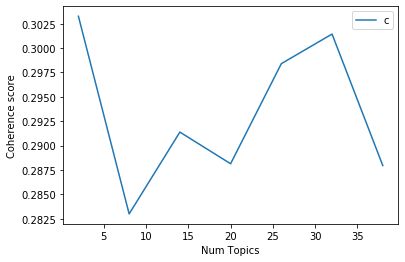

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [60]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3033
Num Topics = 8  has Coherence Value of 0.283
Num Topics = 14  has Coherence Value of 0.2914
Num Topics = 20  has Coherence Value of 0.2881
Num Topics = 26  has Coherence Value of 0.2984
Num Topics = 32  has Coherence Value of 0.3014
Num Topics = 38  has Coherence Value of 0.2879


In [65]:
import spacy

nlp = spacy.load("en_core_web_md")

## Additional Resources
## Resources

* [Gensim](https://radimrehurek.com/gensim/): Python package for topic modeling, nlp, word vectorization, and few other things. Well maintained and well documented.
* [Topic Modeling with Gensim](http://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#11createthedictionaryandcorpusneededfortopicmodeling): A kind of cookbook for LDA with gensim. Excellent overview, but the you need to be aware of missing import statements and assumed prior knowledge.
* [Chinese Restuarant Process](https://en.wikipedia.org/wiki/Chinese_restaurant_process): That really obscure stats thing I mentioned... 
* [PyLDAvis](https://github.com/bmabey/pyLDAvis): Library for visualizing the topic model and performing some exploratory work. Works well. Has a direct parrell implementation in R as well. 
* [Rare Technologies](https://rare-technologies.com/): The people that made & maintain gensim and a few other libraries.
* [Jane Austen v. Charlotte Bronte](https://www.literaryladiesguide.com/literary-musings/jane-austen-charlotte-bronte-different-alike/)